In [1]:
from models.simsiam import SimSiam
from models.facecamera import FaceCameraModel
import torch
import util
from renderer import Renderer
from torchvision import transforms

DTYPE = torch.float
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


config = {
    # FLAME
    'flame_model_path': './data/generic_model.pkl',  # acquire it from FLAME project page
    'flame_lmk_embedding_path': './data/landmark_embedding.npy',
    'tex_space_path': './data/FLAME_texture.npz',  # acquire it from FLAME project page
    'camera_params': 3,
    'shape_params': 100,
    'expression_params': 50,
    'pose_params': 6,
    'tex_params': 50,
    'use_face_contour': True,

    'cropped_size': 256,
    'batch_size': 1,
    'image_size': 420,
    'e_lr': 0.005,
    'e_wd': 0.0001,
    'savefolder': './test_results/',
    # weights of losses and reg terms
    'w_pho': 8,
    'w_lmks': 1,
    'w_shape_reg': 1e-4,
    'w_expr_reg': 1e-4,
    'w_pose_reg': 0,
}

config = util.dict2obj(config)
util.check_mkdir(config.savefolder)

mesh_file = './data/head_template_mesh.obj'
render = Renderer(config.image_size, obj_filename=mesh_file).to(DEVICE)

model = FaceCameraModel(config, render, DEVICE)


/home/w0457094/anaconda3/envs/flametex1.9/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:533: UserWarning: Mtl file does not exist: ./data/template.mtl
  warnings.warn(f"Mtl file does not exist: {f}")


creating the FLAME Decoder


/home/w0457094/git/photometric_optimization/models/FLAME.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('dynamic_lmk_faces_idx', torch.tensor(lmk_embeddings['dynamic_lmk_faces_idx'], dtype=torch.long))
/home/w0457094/git/photometric_optimization/models/FLAME.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('dynamic_lmk_bary_coords', torch.tensor(lmk_embeddings['dynamic_lmk_bary_coords'], dtype=self.dtype))


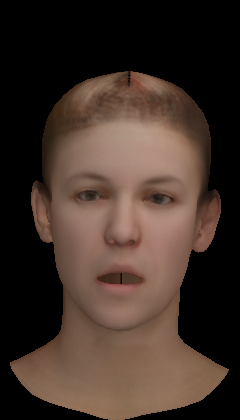

In [71]:
model.set_random(cam_on=False)

image = model(return_alpha=False)[:,:,90:330]

pilimg = transforms.ToPILImage()(image.detach().cpu()).convert("RGB")

pilimg

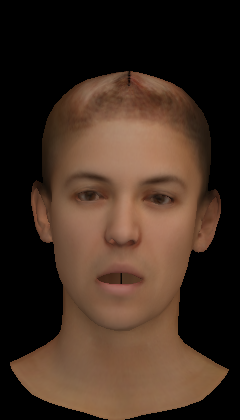

In [92]:
model.set_random(cam_on=False,shape_on=False,exp_on=False,pose_on=False,lights_on=False)
image = model(return_alpha=False)[:,:,90:330]

pilimg = transforms.ToPILImage()(image.detach().cpu()).convert("RGB")
pilimg